In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sqlite3
from lsst.sims.utils import angularSeparation

In [2]:
filename = 'rolling_10yrs_opsim.db'
conn = sqlite3.connect(filename)
pointings = pd.read_sql_query("select fieldRA,fieldDec from SummaryAllProps where filter='i'", conn)

In [3]:
fovRad = 1.75 # LSST radius FoV in degrees


In [4]:
ra_points, dec_points = np.meshgrid(np.arange(0, 360, 20), np.arange(-80, 0, 10))
ra_points = ra_points.ravel()
dec_points = dec_points.ravel()

In [5]:
n_obs = []

In [6]:
for ra, dec in zip(ra_points, dec_points):
    # This is bad and slow, should really use a kd tree
    distances = angularSeparation(pointings['fieldRA'].values, pointings['fieldDec'].values, ra, dec)
    good = np.where(distances < fovRad)[0]
    n_obs.append(np.size(good))

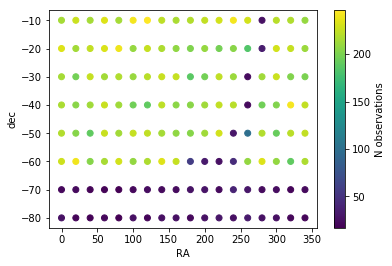

In [7]:
plt.scatter(ra_points, dec_points, c=n_obs)
cb = plt.colorbar()
plt.xlabel('RA')
plt.ylabel('dec')
cb.set_label('N observations')

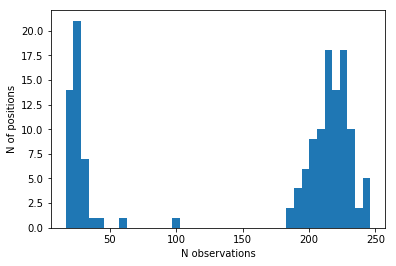

In [8]:
ack = plt.hist(n_obs, bins=40)
plt.xlabel('N observations')
plt.ylabel('N of positions')